## Introducción a Python para el Análisis de datos
###  Webscraping - En proceso

En este documento vamos a mostrar como obtener algunos datos de Internet. 
Desde precios de acciones o de criptomonedas hasta


### 1. Precio de la accion de Facebook desde el 2012 hasta el 2021:

Pandas data reader nos dará información diaria sobre el precio de las acciones. Tendremos datos del precio mínimo, máximo, el precio de apertura y de cierre, etc.

In [1]:
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [2]:
empresa = 'FB'

In [3]:
inicio = dt.datetime(2012,1,1)
final = dt.datetime(2021,1,1)

In [4]:
facebook = web.DataReader(empresa, 'yahoo',inicio ,final)

In [5]:
facebook

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999


In [6]:
import matplotlib.pyplot as plt 

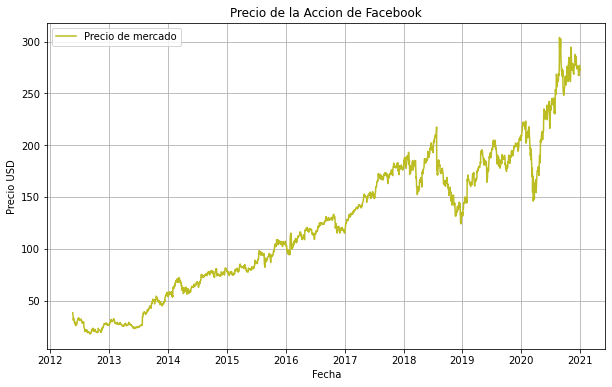

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(facebook.Close, color='tab:olive' ,label='Precio de mercado')

ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Precio de la Accion de Facebook')
ax.grid(True)
ax.legend(loc='upper left');

### 2. Precio de Bitcoin para los ultimos 30 dias:

A diferencia de pandas data reader, pycoingecko nos dará información para cada hora de cada día, por lo que dependiendo de nuestro objetivo, querremos usar una u otra librería. Para este caso obtendremos los datos, los pasaremos a formato diario y haremos una grafica de velas.

In [206]:
#Para instalar pycoingecko
#pip install pycoingecko

In [207]:
from pycoingecko import CoinGeckoAPI

In [208]:
cg = CoinGeckoAPI()

Vamos a obtener los datos de bitcoin en dólares, para los últimos 30 días. Esto lo haremos de la siguiente manera:

In [209]:
bitcoin = cg.get_coin_market_chart_by_id(id='bitcoin' , vs_currency = 'usd', days = 30 )

In [210]:
bitcoinprice = bitcoin['prices']

In [211]:
bitcoindata = pd.DataFrame(bitcoinprice, columns = ['TimeStamp' , 'prices'])

In [213]:
bitcoindata.head(5)

,TimeStamp,prices
0,1621101777350,48137.833428
1,1621105389558,48020.152584
2,1621108951379,47740.050057
3,1621112575824,48299.895745
4,1621116127690,48522.302622


In [214]:
bitcoindata['date'] = pd.to_datetime(bitcoindata['TimeStamp'], unit = 'ms')

In [216]:
bitcoindata.head(5)

,TimeStamp,prices,date
0,1621101777350,48137.833428,2021-05-15 18:02:57.350
1,1621105389558,48020.152584,2021-05-15 19:03:09.558
2,1621108951379,47740.050057,2021-05-15 20:02:31.379
3,1621112575824,48299.895745,2021-05-15 21:02:55.824
4,1621116127690,48522.302622,2021-05-15 22:02:07.690


Ahora pasaremos los datos en un formato de minimo, maximo, primer y ultimo precio, diario. Esto, para crear una grafica de velas.

In [217]:
data = bitcoindata.groupby(bitcoindata.date.dt.date).agg({'prices': ['min' , 'max' , 'first' , 'last']})
# Con este comando agruparemos los datos por dia y encontraremos el precio minimo, maximo, primer y ultimo dato.

In [218]:
data.head(5)

prices                                          
                     min           max         first          last
date                                                              
2021-05-15  47740.050057  48522.302622  48137.833428  48159.550779
2021-05-16  44490.795222  49676.818738  46780.902305  45683.458099
2021-05-17  42600.146924  46585.064135  46585.064135  42746.071431
2021-05-18  42815.404663  45549.156681  43780.825598  43022.377837
2021-05-19  36573.548038  43091.041448  43091.041448  39154.208053

Como podemos ver, los datos que tenemos ahora son datos diarios, y no por hora.
Ahora crearemos una grafica con toda esta información.

In [20]:
# pip install plotly==4.14.3


In [219]:
import plotly.graph_objects as go
#Usaremos plotly para este tipo de grafica

In [225]:
fig = go.Figure(data = [go.Candlestick(x=data.index , 
                        open = data['prices']['first'],
                        high = data['prices']['max'] , 
                        low= data['prices']['min'] , 
                        close = data['prices']['last']
                                      )])

fig.update_layout(xaxis_rangeslider_visible = False , xaxis_title = 'date',
yaxis_title = 'Precio (USD$)' , title = 'Bitcoin gráfico de velas ultimos 30 dias')


![title](graphs/velas.png)

### 3. HTML webscraping


Vamos a obtener alguna información de la siguiente pag web: https://webscraper.io/test-sites/tables

In [2]:
from urllib.request import urlopen

Debemos encontrar en donde esta guardada la información:

![title](graphs/websc1.png)

Vamos a extraer el titulo "Table playground"

In [3]:
url = "https://webscraper.io/test-sites/tables"

In [5]:
website = urlopen(url).read().decode("utf-8")

In [7]:
start = website.find("<h1>") + len("<h1>")

In [8]:
end = website.find("</h1>")

In [9]:
print(website[start:end])

Table playground


La libreria para webscraping es BeautifulSoups

In [14]:
#pip install beautifulsoup4

In [13]:
from bs4 import BeautifulSoup

Vamos ahora a obtener los titulos de las tablas que estan ubicados en las etiquetas h2

In [17]:
soup = BeautifulSoup(website , 'lxml')

In [19]:
headings_h2 = soup.find_all("h2")

In [20]:
print(headings_h2)

[<h2>Semantically correct table with thead and tbody</h2>, <h2>Table without thead tag</h2>, <h2>Table with multiple header rows and an empty data row</h2>]


Acá podemos ver los titulos de las 3 tablas.

Ahora vamos a obtener la informacion de la primera tabla

In [24]:
tabla1 = soup.find('table')
filas = tabla1.findAll('tr')[1:]
last_names = []

for row in filas:
    last_names.append(row.findAll('td')[2].get_text())
print(last_names)

['Otto', 'Thornton', 'the Bird']


### Precio del Dolar

De la pagina https://www.x-rates.com/calculator/?from=USD&to=COP&amount=1 vamos a obtener el precio del dolar en pesos Colombianos hoy.

In [133]:
import requests
from bs4 import BeautifulSoup

In [134]:
urldolar = requests.get('https://www.x-rates.com/calculator/?from=USD&to=COP&amount=1')
soupdolar = BeautifulSoup(urldolar.text, 'html.parser')

preciodolar = soupdolar.find(class_="ccOutputTrail").previous_sibling

In [135]:
print(preciodolar)

3,651.06


### Casos Covid Colombia Hoy
De la pagina https://www.worldometers.info/coronavirus/country/colombia/ vamos a obtener los casos diarios de coronavirus en Colombia. Este dato se encuentra al final de la pag.

In [137]:
urlcovid = requests.get('https://www.worldometers.info/coronavirus/country/colombia/')

In [144]:
soupcovid = BeautifulSoup(urlcovid.text ,'html.parser')
casoshoy = soupcovid.find(class_="news_li").get_text()
print(casoshoy)
#Actualizado 14 de Junio 2021

28,519 new cases and 586 new deaths in Colombia [source]


### Casos Covid en todo el mundo

Codigo hecho por Kiprono Elijah Koech disponible en:

https://github.com/kipronokoech/covid-19-data-scraper

In [168]:
urlcovid2 = requests.get('https://www.worldometers.info/coronavirus/').text

In [170]:
soupcovid2 = BeautifulSoup(urlcovid2 ,'lxml')
casosmundo = soupcovid2.find("table",attrs = {"id": "main_table_countries_today"} )

In [171]:
head = casosmundo.thead.find_all("tr")

In [200]:
headings = []

for th in head[0].find_all("th"):

    print(th.text)

    headings.append(th.text.replace("\n", "").strip())


#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl
1 Deathevery X ppl
1 Testevery X ppl
New Cases/1M pop
New Deaths/1M pop
Active Cases/1M pop


In [201]:
body = casosmundo.tbody.find_all("tr")

In [202]:
dfcovid = []
for r in range(1,len(body)):
    row = []
    for tr in body[r].find_all("td"):
        row.append(tr.text.replace("\n" , "").strip())
    dfcovid.append(row)

In [205]:
dfcovid = pd.DataFrame(dfcovid,columns =headings)
dfcovid.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,Asia,"53,643,143","+108,137","746,955","+1,946","50,759,515","+151,634","2,136,673","27,340",...,,,,Asia,,,,,,
1,,South America,"30,661,358","+1,607","944,223",+57,"27,730,619","+1,999","1,986,516","32,311",...,,,,South America,,,,,,
2,,Europe,"47,212,030","+28,516","1,086,858",+526,"44,548,274","+45,989","1,576,898","10,464",...,,,,Europe,,,,,,
3,,Africa,"5,092,608","+3,643","135,114",+64,"4,548,346","+2,382","409,148","2,785",...,,,,Africa,,,,,,
4,,Oceania,"70,306",+15,"1,255",,"67,450",+1,"1,601",11,...,,,,Australia/Oceania,,,,,,
5,,,721,,15,,706,,0,0,...,,,,,,,,,,
6,,World,"176,855,363","+147,708","3,822,178","+2,737","160,948,084","+207,764","12,085,101","84,872",...,,,,All,,,,,,
7,1,USA,"34,322,045",+887,"615,079",+26,"28,400,913",+781,"5,306,053","4,526",...,"494,381,160","1,485,322","332,844,357",North America,10,541,1,3,0.08,"15,942"
8,2,India,"29,548,012","+40,574","375,185",+898,"28,231,022","+82,045","941,805","8,944",...,"379,624,626","272,550","1,392,864,531",Asia,47,"3,712",4,29,0.6,676
9,3,Brazil,"17,413,996",,"487,476",,"15,794,548",,"1,131,972","8,318",...,"50,801,042","237,396","213,992,634",South America,12,439,4,,,"5,290"


### Tablas de Wikipedia

Ahora intentemos obtener algunas datos de la siguiente pagina:
    
https://es.wikipedia.org/wiki/Anexo:Presidentes_de_Colombia

En esta pag tenemosvarias tablas para diferentes periodos de tiempo. Para encontrar una tabla especifica lo hacemos con el mismo comando pero variando el valor entre corchetes en el codigo de pandas de la siguiente forma:

In [96]:
url3 = "https://es.wikipedia.org/wiki/Anexo:Presidentes_de_Colombia"

Primera tabla, de la lista de presidentes de las Provincias Unidas de la Nueva Granada:

In [109]:
presidentes=pd.read_html(url3, header=0)[0]

In [116]:
presidentes.head()

,Período,Período.1,Efigie,Presidente,Ciudades,Doctrina Política,Comentarios
0,NaN,25 de julio de 1810-1 de abril de 1811,NaN,José Miguel Pey y Andrade (1er. periodo),Santafé,Centralista,Origen del mando: Encargo.Presidente de la Jun...
1,NaN,1 de abril de 1811-19 de septiembre de 1811,NaN,Jorge Tadeo Lozano,Santafé,Federalista,Origen del mando: Elegido.Vicepresidente: José...
2,NaN,19 de septiembre de 1811-29 de agosto de 1813,NaN,Antonio José de Nariño y Álvarez,Santafé,Centralista,Origen del mando: Elegido tras renuncia de Jor...
3,NaN,23 de diciembre de 1811 -24 de diciembre de 1811,NaN,Pedro Groot y Alea,Santafé,Centralista,Presidente provisional de las Provincias Unida...
4,NaN,25 de junio de 1812-5 de agosto de 1812,NaN,Manuel Benito de Castro Arcaya,Santafé,Centralista,Origen del mando: Encargado al asumir Nariño l...


Tabla numero 5 de Presidentes de los Estados Unidos de Colombia. Notese que las tablas van de 0 en adelante.

In [113]:
presidentes2=pd.read_html(url3, header=0)[4]

In [117]:
presidentes2.head()

,Período,Período.1,Efigie,Presidente,Partido,Comentarios
0,NaN,18 de julio de 1861-10 de febrero de 1863,NaN,Tomás Cipriano de Mosquera y Arboleda (2.º per...,Liberal,"Tomó el poder por golpe de estado, luego de tr..."
1,NaN,10 de febrero de 1863-14 de mayo de 1863,NaN,Ejecutivo Plural:- Froilán Largacha Hurtado (P...,Liberales,NaN
2,NaN,14 de mayo de 1863-29 de enero de 1864,NaN,Tomás Cipriano de Mosquera y Arboleda (3.er pe...,Liberal,NaN
3,NaN,29 de enero de 1864-29 de febrero de 1864,NaN,Juán Uricoechea Navarro (Ejecutivo Plural),Liberal,Provisorio. Tomó el poder mientras Mosquera es...
4,NaN,29 de febrero de 1864-1 de abril de 1864,NaN,Tomás Cipriano de Mosquera,Liberal,NaN
